In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [ ]:
#Trainning data
app_train = pd.read_csv('/data/application_train.csv')
app_train.shape

(307511, 122)

In [ ]:
app_train.head()

In [ ]:
app_test = pd.read_csv('/data/application_test.csv')
print('Testing data shape: ', app_test.shape)


Testing data shape:  (48744, 121)


Imbalanced dataset

Repaid: 282686
Not repaid: 24825
Repaid: 91.93 %
Not repaid: 8.07 %


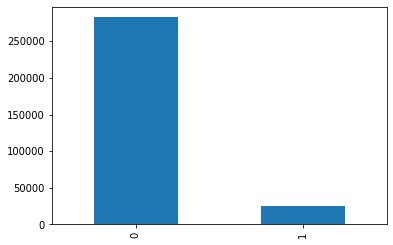

In [ ]:
app_train['TARGET'].value_counts().plot.bar()
n_group = app_train['TARGET'].value_counts()
n_group_sum = n_group.sum()

print('Repaid: {}'.format(n_group[0]))
print('Not repaid: {}'.format(n_group[1]))

print('Repaid: {:.2f} {}'.format(n_group[0]/n_group_sum*100, '%'))
print('Not repaid: {:.2f} {}'.format(n_group[1]/n_group_sum*100, '%'))

In [ ]:
def summary_missing(dataset):
    n_miss = dataset.isnull().sum()
    n_obs = dataset.shape[0]
    n_miss_per = n_miss/n_obs*100
    n_miss_tbl = pd.concat([n_miss, n_miss_per], axis = 1).sort_values(1, ascending = False).round(1)
    n_miss_tbl = n_miss_tbl[n_miss_tbl[1] != 0]
    print('No fields: ', dataset.shape[0])
    print('No missing fields: ', n_miss_tbl.shape[0])
    n_miss_tbl = n_miss_tbl.rename(columns = 
                {0:'Number mising Value', 1:'Percentage missing Value'})
    return n_miss_tbl
summary_missing(app_train)

No fields:  307511
No missing fields:  64


,Number mising Value,Percentage missing Value
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
...,...,...
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.3
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.3
DEF_60_CNT_SOCIAL_CIRCLE,1021,0.3
EXT_SOURCE_2,660,0.2


In [ ]:
def _tbl_dtype(dataset):
    sum_dtype = pd.DataFrame(dataset.dtypes).sort_values(0).rename(columns={0:'Data Type'})
    return sum_dtype

table_dtype = _tbl_dtype(app_train)
table_dtype

,Data Type
SK_ID_CURR,int64
FLAG_CONT_MOBILE,int64
FLAG_PHONE,int64
FLAG_EMAIL,int64
FLAG_DOCUMENT_9,int64
...,...
OCCUPATION_TYPE,object
WEEKDAY_APPR_PROCESS_START,object
ORGANIZATION_TYPE,object
NAME_TYPE_SUITE,object


In [ ]:
table_dtype['Data Type'].value_counts()

float64    65
int64      41
object     16
Name: Data Type, dtype: int64

In [ ]:
app_train.select_dtypes('object').head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN


In [ ]:
app_train.select_dtypes('object').apply(pd.Series.nunique)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

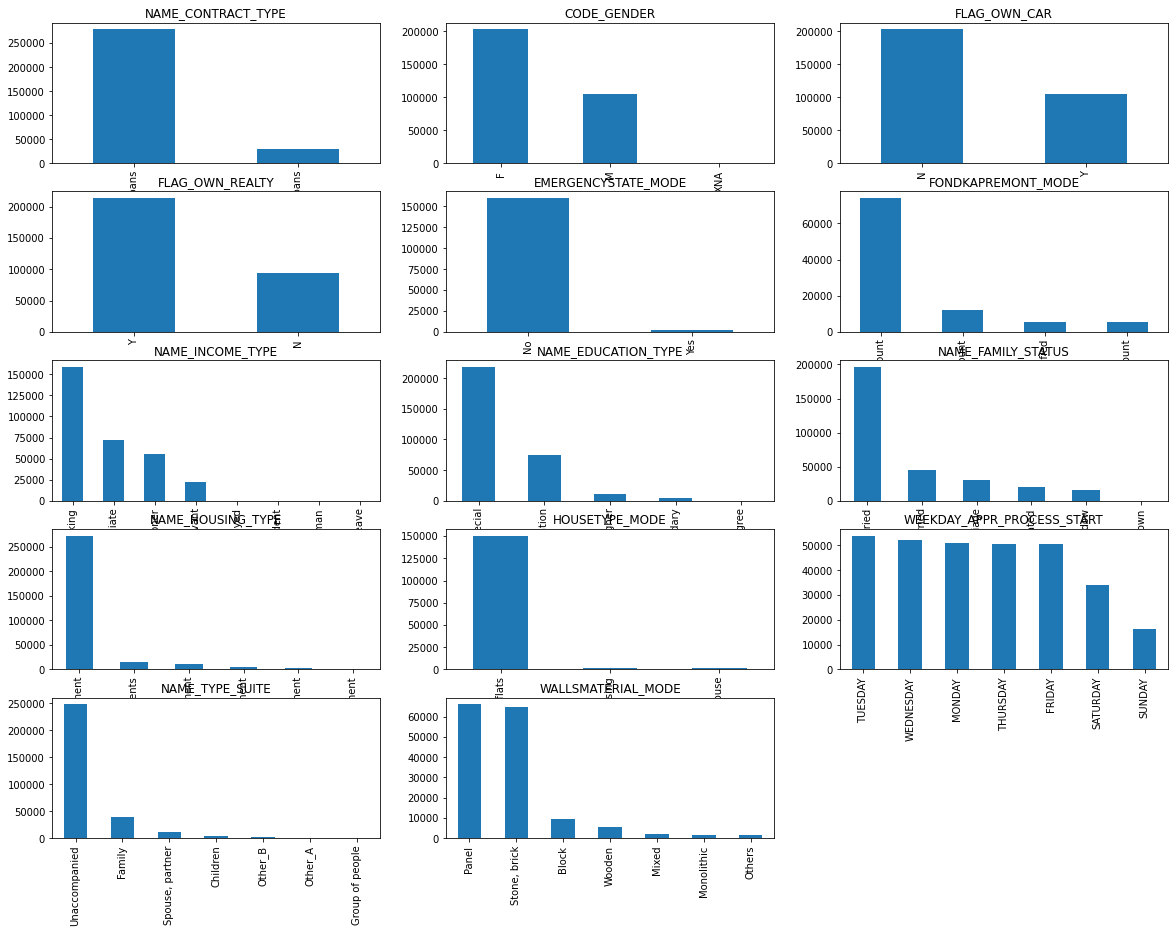

In [ ]:
dtypes_object = table_dtype[table_dtype['Data Type'] == 'object'].index.tolist()
dtypes_object = [col for col in dtypes_object if col not in ['OCCUPATION_TYPE', 'ORGANIZATION_TYPE']]


def _plot_bar_classes(cols):
    app_train[cols].value_counts().plot.bar()

plt.figure(figsize = (20, 15))    
for i in range(1, 15, 1):
    plt.subplot(5, 3, i)
    _plot_bar_classes(dtypes_object[i-1])
    plt.title(dtypes_object[i-1])

In [ ]:
def _per_categorical(col):
    tbl_per = pd.pivot_table(app_train[['TARGET', col]], index = ['TARGET'], columns = [col], aggfunc = len)
    per_categorical = (tbl_per.iloc[0, :]/tbl_per.iloc[1, :]).sort_values(ascending = True)
    print(per_categorical)
    print('-------------------------------------\n')
    return per_categorical

for col in dtypes_object:
    _per_categorical(col)

NAME_CONTRACT_TYPE
Cash loans         10.981913
Revolving loans    17.253741
dtype: float64
-------------------------------------

CODE_GENDER
M       8.860066
F      13.287085
XNA          NaN
dtype: float64
-------------------------------------

FLAG_OWN_CAR
N    10.764392
Y    12.805042
dtype: float64
-------------------------------------

FLAG_OWN_REALTY
N    11.012114
Y    11.560325
dtype: float64
-------------------------------------

EMERGENCYSTATE_MODE
Yes     9.439462
No     13.357709
dtype: float64
-------------------------------------

FONDKAPREMONT_MODE
not specified            12.256410
reg oper account         13.330357
reg oper spec account    14.252525
org spec account         16.183486
dtype: float64
-------------------------------------

NAME_INCOME_TYPE
Maternity leave          1.500000
Unemployed               1.750000
Working                  9.429191
Commercial associate    12.361381
State servant           16.376301
Pensioner               17.565392
Businessman  

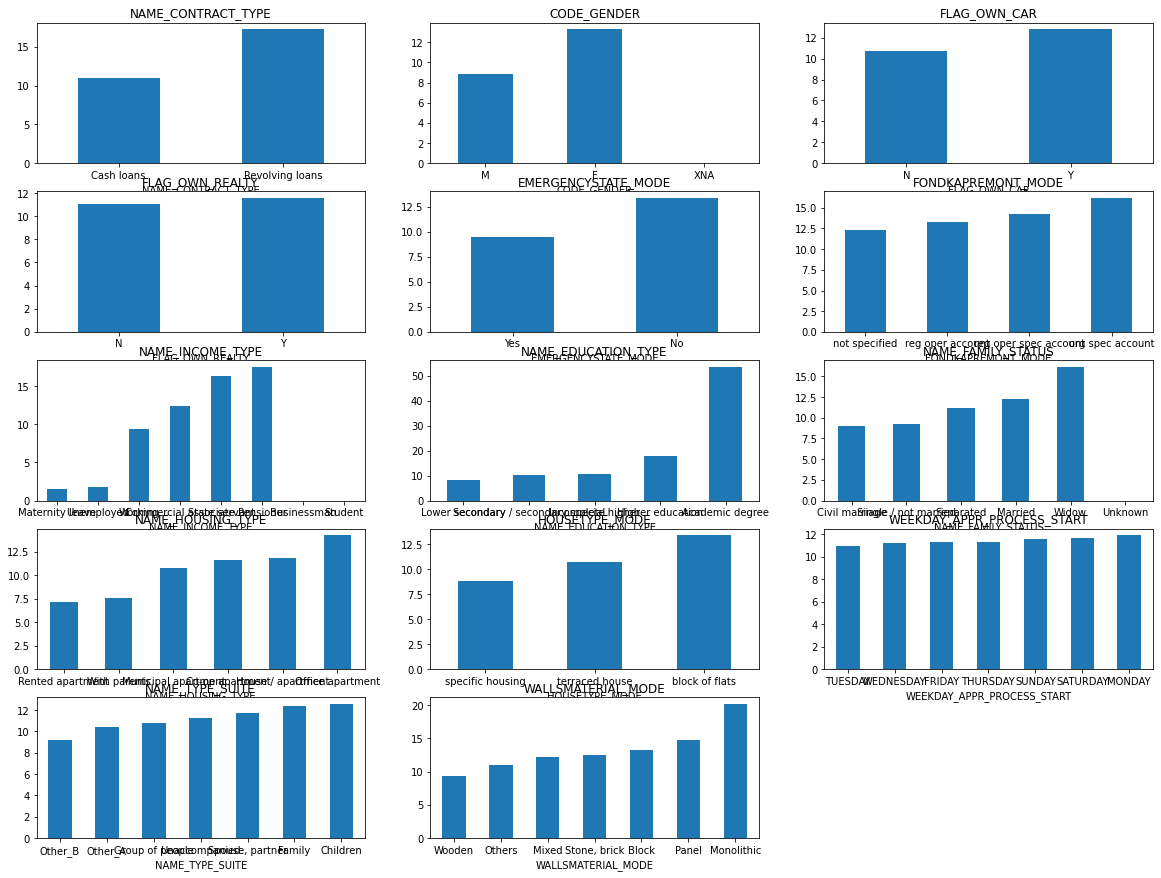

In [ ]:
def _plot_per_categorical(col):
    tbl_per = pd.pivot_table(app_train[['TARGET', col]], index = ['TARGET'], columns = [col], aggfunc = len)
    per_categorical = (tbl_per.iloc[0, :]/tbl_per.iloc[1, :]).sort_values(ascending = True)
    per_categorical.plot.bar(rot=0)
    plt.title(col)
    return per_categorical

plt.figure(figsize = (20, 15))
i = 0
for col in dtypes_object:
    i += 1
    plt.subplot(5, 3, i)
    _plot_per_categorical(col)

In [ ]:
for col in ['ORGANIZATION_TYPE', 'OCCUPATION_TYPE']:
    _per_categorical(col)

ORGANIZATION_TYPE
Transport: type 3          5.347594
Industry: type 13          6.444444
Industry: type 8           7.000000
Restaurant                 7.542453
Construction               7.561783
Cleaning                   7.965517
Industry: type 1           8.034783
Industry: type 3           8.419540
Realtor                    8.428571
Agriculture                8.548638
Trade: type 3              8.673130
Self-employed              8.829069
Industry: type 4           8.853933
Security                   9.021605
Trade: type 7              9.582432
Business Entity Type 3     9.753124
Transport: type 4          9.774451
Mobile                     9.931034
Trade: type 1             10.225806
Industry: type 11         10.555556
Business Entity Type 2    10.725556
Postal                    10.851648
Advertising               11.257143
Business Entity Type 1    11.287474
Industry: type 7          11.447619
Housing                   11.587234
Legal Services            11.708333
Transport:

In [ ]:
# Nhóm các giá trị rate gần bằng nhau vào 1 nhóm theo schedule_div.
def _devide_group(col, schedule_div = None, n_groups = 3, *kwargs):
    cols = []
    tbl_per_cat = _per_categorical(col)
    
    if schedule_div is None:
        n_cats = len(tbl_per_cat)
        n_val_incat = int(n_cats/n_groups)
        n_odd = n_cats - n_groups*n_val_incat

        for i in range(n_groups):
            if i == n_groups - 1:
                el = tbl_per_cat[(n_val_incat*i):(n_val_incat*(i+1)+n_odd)].index.tolist()
            else:
                el = tbl_per_cat[(n_val_incat*i):n_val_incat*(i+1)].index.tolist()    
            cols.append(el)
    else:
        idx = 0
        for n_cols in schedule_div:
            el_cols = tbl_per_cat[idx:(idx+n_cols)].index.tolist()
            cols.append(el_cols)
            idx += n_cols
                
    return cols

cols_OCCUPATION_TYPE = _devide_group(col = 'OCCUPATION_TYPE', schedule_div = [1, 7, 9, 1])
cols_OCCUPATION_TYPE

OCCUPATION_TYPE
Low-skill Laborers        4.830084
Drivers                   7.829141
Waiters/barmen staff      7.868421
Security staff            8.308864
Laborers                  8.452895
Cooking staff             8.574879
Sales staff               9.382277
Cleaning staff            9.409396
Realty agents            11.728814
Secretaries              13.184783
Medicine staff           13.924825
Private service staff    14.154286
IT staff                 14.470588
HR staff                 14.638889
Core staff               14.863061
Managers                 15.092620
High skill tech staff    15.233951
Accountants              19.702532
dtype: float64
-------------------------------------



[['Low-skill Laborers'],
 ['Drivers',
  'Waiters/barmen staff',
  'Security staff',
  'Laborers',
  'Cooking staff',
  'Sales staff',
  'Cleaning staff'],
 ['Realty agents',
  'Secretaries',
  'Medicine staff',
  'Private service staff',
  'IT staff',
  'HR staff',
  'Core staff',
  'Managers',
  'High skill tech staff'],
 ['Accountants']]

In [ ]:
cols_ORGANIZATION_TYPE = _devide_group(col = 'ORGANIZATION_TYPE')
cols_ORGANIZATION_TYPE

ORGANIZATION_TYPE
Transport: type 3          5.347594
Industry: type 13          6.444444
Industry: type 8           7.000000
Restaurant                 7.542453
Construction               7.561783
Cleaning                   7.965517
Industry: type 1           8.034783
Industry: type 3           8.419540
Realtor                    8.428571
Agriculture                8.548638
Trade: type 3              8.673130
Self-employed              8.829069
Industry: type 4           8.853933
Security                   9.021605
Trade: type 7              9.582432
Business Entity Type 3     9.753124
Transport: type 4          9.774451
Mobile                     9.931034
Trade: type 1             10.225806
Industry: type 11         10.555556
Business Entity Type 2    10.725556
Postal                    10.851648
Advertising               11.257143
Business Entity Type 1    11.287474
Industry: type 7          11.447619
Housing                   11.587234
Legal Services            11.708333
Transport:

[['Transport: type 3',
  'Industry: type 13',
  'Industry: type 8',
  'Restaurant',
  'Construction',
  'Cleaning',
  'Industry: type 1',
  'Industry: type 3',
  'Realtor',
  'Agriculture',
  'Trade: type 3',
  'Self-employed',
  'Industry: type 4',
  'Security',
  'Trade: type 7',
  'Business Entity Type 3',
  'Transport: type 4',
  'Mobile',
  'Trade: type 1'],
 ['Industry: type 11',
  'Business Entity Type 2',
  'Postal',
  'Advertising',
  'Business Entity Type 1',
  'Industry: type 7',
  'Housing',
  'Legal Services',
  'Transport: type 2',
  'Other',
  'Telecom',
  'Industry: type 2',
  'Industry: type 6',
  'Emergency',
  'Kindergarten',
  'Trade: type 2',
  'Government',
  'Industry: type 5',
  'Industry: type 9'],
 ['Electricity',
  'Services',
  'Medicine',
  'Industry: type 10',
  'Hotel',
  'Trade: type 5',
  'School',
  'Religion',
  'Insurance',
  'Culture',
  'XNA',
  'Bank',
  'Military',
  'Police',
  'University',
  'Security Ministries',
  'Trade: type 6',
  'Transpo

In [ ]:
def _map_lambda_cats(cols_list, colname, x): 
    cats = list(map(lambda x:colname + '_' + str(x), np.arange(len(cols_list)).tolist()))
    for i in range(len(cols_ORGANIZATION_TYPE)):
        if x in cols_list[i]:
            return cats[i]
        
def _map_cats(cols_list, colname, dataset):                    
    return list(map(lambda x: _map_lambda_cats(cols_list, colname, x), 
                    dataset[colname]))

app_train['ORGANIZATION_TYPE'] = _map_cats(cols_ORGANIZATION_TYPE, 'ORGANIZATION_TYPE', app_train)
pd.Series.unique(app_train['ORGANIZATION_TYPE'])

array(['ORGANIZATION_TYPE_0', 'ORGANIZATION_TYPE_2',
       'ORGANIZATION_TYPE_1'], dtype=object)

Test Data

In [ ]:
app_test['ORGANIZATION_TYPE'] = _map_cats(cols_ORGANIZATION_TYPE, 'ORGANIZATION_TYPE', app_test)
pd.Series.unique(app_test['ORGANIZATION_TYPE'])

array(['ORGANIZATION_TYPE_1', 'ORGANIZATION_TYPE_0',
       'ORGANIZATION_TYPE_2'], dtype=object)

In [ ]:
app_train['OCCUPATION_TYPE'] = _map_cats(cols_OCCUPATION_TYPE, 'OCCUPATION_TYPE', app_train)
app_test['OCCUPATION_TYPE'] = _map_cats(cols_OCCUPATION_TYPE, 'OCCUPATION_TYPE', app_test)

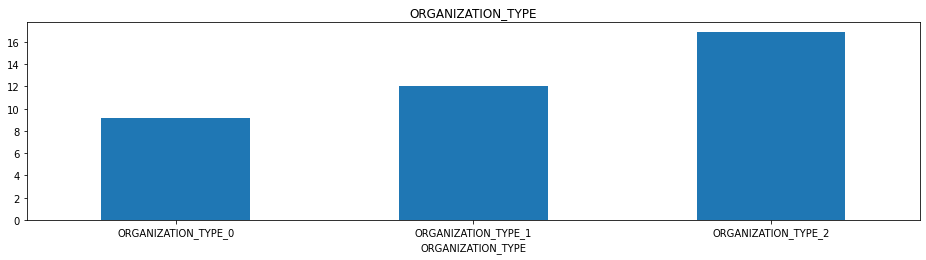

In [ ]:
i = 0
plt.figure(figsize = (16, 8))
for col in ['ORGANIZATION_TYPE']:
    i += 1
    plt.subplot(2, 1, i)
    _plot_per_categorical(col)



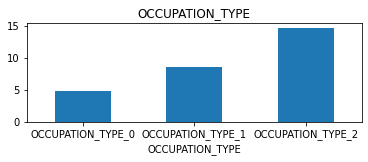

In [ ]:
for col in ['OCCUPATION_TYPE']:
    i += 1
    plt.subplot(2, 1, i)
    _plot_per_categorical(col)

In [ ]:
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

In [ ]:
print('app_train shape: ', app_train.shape)
print('app_test shape: ', app_test.shape)

In [ ]:
for fea_name in app_train.columns:
    if fea_name not in app_test.columns:
        print(fea_name)

TARGET
CODE_GENDER_XNA
NAME_INCOME_TYPE_Maternity leave
NAME_FAMILY_STATUS_Unknown


In [ ]:
TARGET = app_train['TARGET']

# Lệnh align theo axis = 1 sẽ lấy những trường xuất hiện đồng thời trong app_train và app_test
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)
# Sau lệnh align biến TARGET bị mất, do đó ta cần gán lại biến này
app_train['TARGET'] = TARGET

print('app_train shape: ', app_train.shape)
print('app_test shape: ', app_test.shape)

app_train shape:  (307511, 173)
app_test shape:  (48744, 172)


Xử lý outlier


In [ ]:
app_train.head()


In [ ]:
app_train['AMT_INCOME_TOTAL'].describe().plot.box()

In [ ]:
app_train['AMT_INCOME_TOTAL'].describe()

Giá trị cao nhất khoảng 117 triệu đô trong khi trung bình thu nhập chỉ khoảng 168 nghìn USD


In [ ]:
def _plot_density(colname):
    plt.figure(figsize = (10, 8))
    sns.kdeplot(app_train[colname][app_train['TARGET'] == 0], label = 'Target = 0')
    sns.kdeplot(app_train[colname][app_train['TARGET'] == 1], label = 'Target = 1')
    plt.xlabel(colname)
    plt.ylabel('Density')
    plt.title('Distribution of %s'%colname)

_plot_density('AMT_INCOME_TOTAL')

In [ ]:
def _zoom_3sigma(col, dataset, dataset_apl):
    '''
    col: Tên cột dữ liệu
    dataset: Bảng dữ liệu gốc sử dụng để tính khoảng 3 sigma
    dataset_apl: Bảng dữ liệu mới áp dụng khoảng 3 sigma được lấy từ dataset.
    '''
    xs = dataset[col]
    mu = xs.mean()
    sigma = xs.std()
    low =  mu - 3*sigma
#     low =  0 if low < 0 else low
    high = mu + 3*sigma
    
    def _value(x):
        if x < low: return low
        elif x > high: return high
        else: return x
    xapl = dataset_apl[col]    
    xnew = list(map(lambda x: _value(x), xapl))
    n_low = len([i for i in xnew if i == low])
    n_high = len([i for i in xnew if i == high])
    n = len(xapl)
    print('Percentage of low: {:.2f}{}'.format(100*n_low/n, '%'))
    print('Percentage of high: {:.2f}{}'.format(100*n_high/n, '%'))
    print('Low value: {:.2f}'.format(low))
    print('High value: {:.2f}'.format(high))
    return xnew

# Kiểm tra với biến FLAG_MOBIL
x = _zoom_3sigma('FLAG_MOBIL', app_train, app_train) 

In [ ]:
app_train.dtypes.unique()

In [ ]:
# Thống kê các giá trị khác biệt trong toàn bộ các biến.
def _count_unique(x):
    return pd.Series.nunique(x)

tbl_dis_val = app_train.apply(_count_unique).sort_values(ascending = False)
tbl_dis_val[tbl_dis_val > 500]

In [ ]:

cols_3sigma = tbl_dis_val[tbl_dis_val > 500].index.tolist()
# Loại bỏ biến key là SK_ID_CURR ra khỏi danh sách:
cols_3sigma = cols_3sigma[1:]

In [ ]:
# Loại bỏ các outlier bằng 3 sigma
for col in cols_3sigma:
    print(col)
    app_train[col] = _zoom_3sigma(col, app_train, app_train) 
    print('------------------------\n')

In [ ]:
for col in cols_3sigma:
    print(col)
    app_test[col] = _zoom_3sigma(col, app_train, app_test) 
    print('------------------------\n')

In [ ]:
# Kiểm tra lại biến AMT_INCOME_TOTAL sau khi loại bỏ outlier
app_train['AMT_INCOME_TOTAL'].describe().plot.box()

In [ ]:
_plot_density('AMT_INCOME_TOTAL')

Xử lý data missing

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer


if 'TARGET' in app_train.columns:
    TARGET = app_train.pop('TARGET')

# Gán train và test vào app_train và app_test; train, test được sử dụng để scale dữ liệu
train = app_train
test = app_test

# Khởi tạo inputer theo phương pháp trung bình
inputer = SimpleImputer(strategy = 'mean')
inputer.fit(train)

# Điền các giá trị NA bằng trung bình
train = inputer.transform(train)
test = inputer.transform(test)

# Khởi tạo scaler theo phương pháp MinMaxScaler trong khoảng [-1, 1]
scaler = MinMaxScaler(feature_range = (-1, 1))
scaler.fit(train)

# Scale dữ liệu trên train và test
train = scaler.transform(train)
test = scaler.transform(test)

# Loại bỏ cột SK_ID_CURR đầu tiên do cột này là key. Khi cần lấy từ app_train và app_test sang
train = train[:, 1:]
test = test[:, 1:]

print('train shape: ', train.shape)
print('test shape: ', test.shape)

#Mô hình
Đánh giá mức độ tương quan


In [ ]:
app_train['TARGET'] = TARGET
corr_tbl = app_train.corr()
corr_tbl

In [ ]:
TARGET

In [ ]:
corr_tbl['TARGET'].sort_values()

In [ ]:
pd_train = pd.DataFrame(train, columns = app_train.columns[1:-1])
pd_train['TARGET'] = TARGET
pd_train.head()

In [ ]:
corr_tbl_train = pd_train.corr()
corr_tbl_train

In [ ]:
corr_tbl_train['TARGET'].sort_values()

In [ ]:
# Lấy ra danh sách 15 biến có tương quan lớn nhất tới biến mục tiêu theo trị tuyệt đối.
cols_corr_15 = np.abs(corr_tbl_train['TARGET']).sort_values()[-16:].index.tolist()

# Tính ma trận hệ số tương quan
cols_tbl_15 = pd_train[cols_corr_15].corr()

# Biểu diễn trên biểu đồ heatmap
plt.figure(figsize = (13, 10))
sns.heatmap(cols_tbl_15, cmap = plt.cm.RdYlBu_r, annot = True)
# plt.imsave('image.png')

In [ ]:
plt.figure(figsize = (20, 5))
for i in range(5):
    _plot_density(cols_corr_15[i])

In [ ]:
age_bin = app_train[['TARGET', 'DAYS_BIRTH']]
age_bin['YEAR_OLD'] = -app_train['DAYS_BIRTH']/365

# Phân chia khoảng tuổi thanh 10 khoảng bằng nhau
age_bin['DAYS_BIN'] = pd.cut(age_bin['YEAR_OLD'], bins = np.linspace(20, 70, num = 11))
age_bin.head()

Thống kê số lượng không trả nợ theo khoảng độ tuổi

In [ ]:
age_bin.groupby(['DAYS_BIN']).mean()

In [ ]:
plt.figure(figsize = (8, 6))
age_bin.groupby(['DAYS_BIN']).mean()['TARGET'].plot.barh(color = 'b')
plt.xticks(rotation = '75')
plt.xlabel('Not Repaid rate')


In [ ]:
from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler
from sklearn.impute import SimpleImputer
# Khởi tạo các preprocessing. Trong đó inputer theo mean, minmax scaler theo khoảng 0, 1 và polynomial features bậc 3.
inputer = SimpleImputer(strategy = 'mean')
minmax_scaler = MinMaxScaler(feature_range = (0, 1))
poly_engineer = PolynomialFeatures(degree = 3)

# Lấy các feature có tương quan lớn nhất đến biến mục tiêu từ app_train và app_test
TARGET = app_train[cols_corr_15[-1]]
train_poly_fea = app_train[cols_corr_15[:-1]]
test_poly_fea = app_test[cols_corr_15[:-1]]

# input dữ liệu missing
inputer = inputer.fit(train_poly_fea)
train_poly_fea = inputer.transform(train_poly_fea)
test_poly_fea = inputer.transform(test_poly_fea)

# Minmax scaler dữ liệu
minmax_scaler = minmax_scaler.fit(train_poly_fea)
train_poly_fea = minmax_scaler.transform(train_poly_fea)
test_poly_fea = minmax_scaler.transform(test_poly_fea)

print('train_poly_fea shape: ', train_poly_fea.shape)
print('test_poly_fea shape: ', test_poly_fea.shape)

In [ ]:
# Polynormial features dữ liệu
poly_engineer = poly_engineer.fit(train_poly_fea)
train_poly_fea = poly_engineer.transform(train_poly_fea)
test_poly_fea = poly_engineer.transform(test_poly_fea)

print('train_poly_fea shape: ', train_poly_fea.shape)
print('test_poly_fea shape: ', test_poly_fea.shape)

In [ ]:
features = poly_engineer.get_feature_names(input_features = cols_corr_15[:-1])
features[:10]

In [ ]:
# Deep learning với Keras
from keras.layers import Input, Dense, Concatenate, concatenate, Dropout, Lambda
from keras.models import Model
from keras.layers.embeddings import Embedding

In [ ]:
# design neural network
input_els = []
encode_els = []

# Generate a list include many Input layers

for i in range(train.shape[1]):
    # input alway have the shape (*, 1)
    input_els.append(Input(shape = (1,)))
    encode_els.append(input_els[-1])
# encode_els

In [ ]:
# concate nate all layers
encode_els = concatenate(encode_els) 

# After completed the input layers, we design the hidden layers
hidden1 = Dense(units = 128, kernel_initializer = 'normal', activation = 'relu')(encode_els)
droplayer1 = Dropout(0.2)(hidden1)
hidden2 = Dense(64, kernel_initializer = 'normal', activation = 'relu')(droplayer1)
droplayer2 = Dropout(0.2)(hidden2)
outputlayer = Dense(1, kernel_initializer = 'normal', activation = 'sigmoid')(droplayer2)

classifier = Model(inputs=input_els, outputs=[outputlayer])

In [ ]:
from numpy import savetxt

In [ ]:
classifier.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])
classifier.summary()

In [ ]:
train.shape

In [ ]:
# split train/valid
from sklearn.model_selection import KFold
count = 0
kfold = KFold(n_splits = 10, shuffle = True, random_state = 12)
valid_scores = []
train_scores = []
for train_idx, valid_idx in kfold.split(train_poly_fea):
    while count < 1:
        count += 1
        # Split train, valid
        train_features, train_labels = train[train_idx], TARGET[train_idx]
        valid_features, valid_labels = train[valid_idx], TARGET[valid_idx]
        # for i in range(train.shape[1]):
        #     print(train_features[:, 1].shape)
        # k = np.array([train_features[:, i] for i in range(train.shape[1])])
        classifier.fit(
            [train_features[:, i] for i in range(train.shape[1])], #lấy list toàn bộ các cột
            train_labels,
            epochs=5,
            batch_size=128,
            shuffle=True,
            validation_data=([valid_features[:, i] for i in range(train.shape[1])], valid_labels) 
        )

Epoch 1/5
2163/2163 [==============================] - 19s 8ms/step - loss: 0.2861 - accuracy: 0.9178 - val_loss: 0.2681 - val_accuracy: 0.9194
Epoch 2/5
2163/2163 [==============================] - 17s 8ms/step - loss: 0.2683 - accuracy: 0.9193 - val_loss: 0.2609 - val_accuracy: 0.9194
Epoch 3/5
2163/2163 [==============================] - 19s 9ms/step - loss: 0.2629 - accuracy: 0.9193 - val_loss: 0.2563 - val_accuracy: 0.9194
Epoch 4/5
2163/2163 [==============================] - 18s 8ms/step - loss: 0.2593 - accuracy: 0.9193 - val_loss: 0.2539 - val_accuracy: 0.9194
Epoch 5/5
2163/2163 [==============================] - 19s 9ms/step - loss: 0.2576 - accuracy: 0.9193 - val_loss: 0.2524 - val_accuracy: 0.9194


In [ ]:
# Dự báo trên tập train.
train_prob_nn = classifier.predict([train[:, i] for i in range(train.shape[1])])
train_prob_nn

array([[0.3146736 ],
       [0.02137396],
       [0.0388568 ],
       ...,
       [0.04569182],
       [0.09203812],
       [0.0570989 ]], dtype=float32)

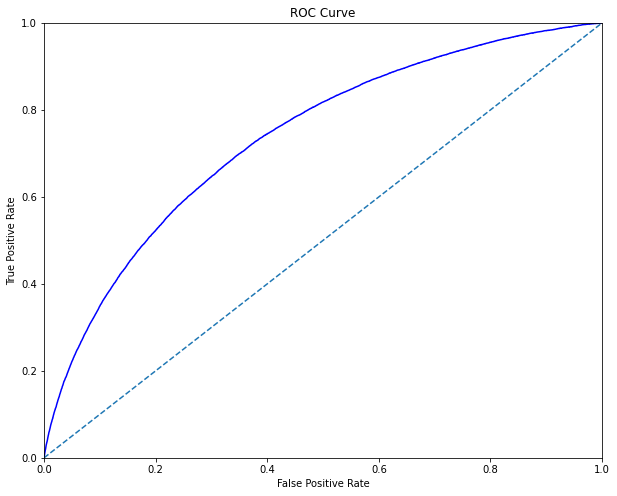

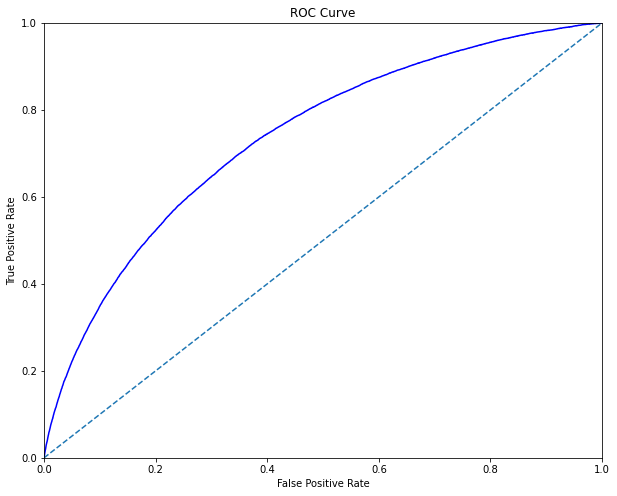

In [ ]:
from sklearn.metrics import roc_curve


def _plot_roc_curve(fpr, tpr, thres):
    roc = plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', label = 'ROC')
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    return roc

fpr4, tpr4, thres4 = roc_curve(TARGET, train_prob_nn)
_plot_roc_curve(fpr4, tpr4, thres4)

In [ ]:
from sklearn.metrics import auc, precision_recall_curve, accuracy_score

auc(fpr4, tpr4)

0.7364786745511243

In [ ]:
def _plot_prec_rec_curve(prec, rec, thres):
    plot_pr = plt.figure(figsize = (10, 8))
    plt.plot(thres, prec[:-1], 'b--', label = 'Precision')
    plt.plot(thres, rec[:-1], 'g-', label = 'Recall')
    plt.xlabel('Threshold')
    plt.ylabel('Probability')
    plt.title('Precsion vs Recall Curve')
    return plot_pr

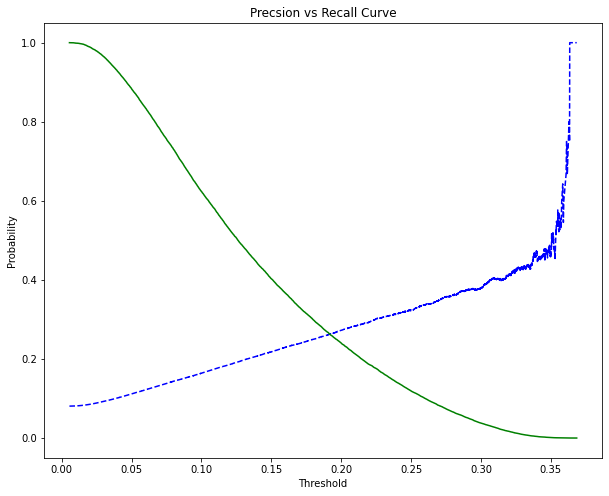

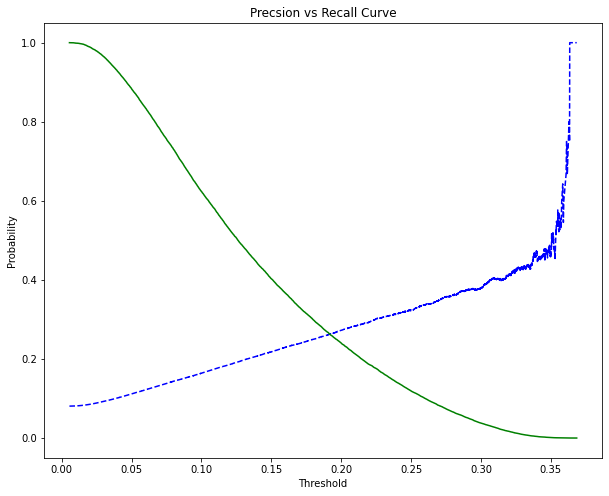

In [ ]:
prec, rec, thres = precision_recall_curve(TARGET, train_prob_nn)
_plot_prec_rec_curve(prec, rec, thres)

In [ ]:
y_pred = (train_prob_nn >= 0.5)
y_test = TARGET

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, output_dict=True)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


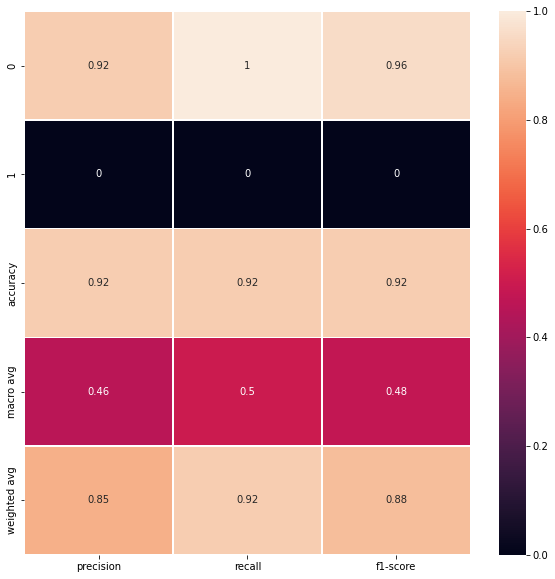

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))   
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, linewidths=.5, ax=ax)